<h1>Course 9 Capstone. Final Project.</h1>
<h3>By Michael Rodriguez Gamboa.</h3>
<h4>September, 2020</h4>

<p>This capstone project course will give you a taste of what data scientists go through in real life when working with data.</p>

<h2>Classification of the severity of traffic accidents in Seatle. Data Analysis and Predictive Model.</h2>

In [1]:
#week 1
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
print("All the libraries had been imported...")
print("Hello, Capstone Project Course!")

All the libraries had been imported...
Hello, Capstone Project Course!


<h1>1) Introduction</h1>

<i>#week 2.</i>
<h4>Defining the problem:</h4>
<p><strong>Business Understanding: </strong>Can we predict the severity of a car accident before it happen? Well, with enough data, data analysis and Machine learning it's posible. When all the work done, we could predict the risk level and the consecuences involved in a simple ride around the city. This will help to the transit police, the pertinent autorities and the drivers to prevent accidents when dangerous conditions arise.
</p>

<p><strong>Data understanding: </strong>For this research I'm going to use the Dataset from the weekly transit collision report of Seattle. These Data contain all the relevant information on transit accidents from 2004 to 2020. I'm going to use these Data to build a clasification K-means algorithm for a predictive model with machine learning. 
</p>

<h1>2) Data Exploration</h1>

<h4>2.1 Reading Data</h4>

In [7]:
#read data
path = "Dataset/Data-Collisions.csv"
df = pd.read_csv(path)
df.head()

c:\users\casa\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [8]:
#descriptive analysis
print("Shape:", df.shape)
df.describe()

Shape: (194673, 38)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


<h4>2.2 Refining the dataframe</h4>

In [9]:
#drop unneeded columns, like descriptions already with code counterpart. 
df.drop(['OBJECTID', 'LOCATION', 'INCKEY', 'COLDETKEY','INTKEY', 'STATUS', 'REPORTNO', 'SEVERITYDESC', 'SEVERITYCODE.1', 'COLLISIONTYPE','INCDTTM','SDOT_COLCODE','SDOT_COLDESC','ST_COLDESC','SDOTCOLNUM', 'ST_COLCODE', 'CROSSWALKKEY', 'SEGLANEKEY'], axis=1, inplace=True)

#for now I'm not going to use X, Y. Maybe in the end to make a choropleth map of Seattle.
df.drop(['X', 'Y'], axis= 1, inplace= True)

#new df
print("Dimensions:", df.shape)
df.head(3)

Dimensions: (194673, 18)


,SEVERITYCODE,ADDRTYPE,EXCEPTRSNCODE,EXCEPTRSNDESC,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,2,Intersection,,NaN,2,0,0,2,2013/03/27 00:00:00+00,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN,NaN,N
1,1,Block,NaN,NaN,2,0,0,2,2006/12/20 00:00:00+00,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,N
2,1,Block,NaN,NaN,4,0,0,3,2004/11/18 00:00:00+00,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN,NaN,N


<h4>2.3 Dealing with null values</h4>

In [10]:
#null data exploration

#Unknown values to NaN
for column in df.columns.values:
    df[column].replace('Unknown', np.nan, inplace = True)
print('Unknown values had been converted to NaN.')

#Other values to NaN
for column in df.columns.values:
    df[column].replace('Other', np.nan, inplace = True)
print('\"Other\" values had been converted to NaN.')
    
print("\nTotal of null values over 65% grouped by column:")
nulls_df = df.isnull().sum()
nullValues_list = df.isnull().sum().tolist()
nullIndex_list = nulls_df.index.values.tolist()
i = 0
for name in nullIndex_list:
    if(nullValues_list[i]>df.shape[0]/1.53):
        print(name, nullValues_list[i])
    i = i + 1 

Unknown values had been converted to NaN.
"Other" values had been converted to NaN.

Total of null values over 65% grouped by column:
EXCEPTRSNDESC 189035
INATTENTIONIND 164868
PEDROWNOTGRNT 190006
SPEEDING 185340


In [11]:
#dropping columns with null values over 65% of the total of rows
df.drop(['EXCEPTRSNCODE', 'EXCEPTRSNDESC','INATTENTIONIND', 'PEDROWNOTGRNT', 'SPEEDING'], axis= 1, inplace=True)
print(df.shape)
df.head(3)

(194673, 13)


,SEVERITYCODE,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,2,Intersection,2,0,0,2,2013/03/27 00:00:00+00,At Intersection (intersection related),N,Overcast,Wet,Daylight,N
1,1,Block,2,0,0,2,2006/12/20 00:00:00+00,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,N
2,1,Block,4,0,0,3,2004/11/18 00:00:00+00,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,N


In [12]:
#checking for null values in columns.
print(df.isnull().sum())

#Storing all the columns names with at least 1 null value.
columnsWithNullValues_list = []
for columnName in df.columns.values:
    if(df[columnName].isnull().sum()>0):
        columnsWithNullValues_list.append(columnName)
    
print('List of columns with null values:',columnsWithNullValues_list)

SEVERITYCODE        0
ADDRTYPE         1926
PERSONCOUNT         0
PEDCOUNT            0
PEDCYLCOUNT         0
VEHCOUNT            0
INCDATE             0
JUNCTIONTYPE     6338
UNDERINFL        4884
WEATHER         21004
ROADCOND        20222
LIGHTCOND       18878
HITPARKEDCAR        0
dtype: int64
List of columns with null values: ['ADDRTYPE', 'JUNCTIONTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND']


In [13]:
for column in columnsWithNullValues_list:
    print(column,'had:',df[column].isnull().sum(), 'null values.')
    frecuentValue = df[column].value_counts().nlargest(1).index[0]
    df[column].replace(np.nan, frecuentValue, inplace = True)
    print("All NaN values had been replaced with:", frecuentValue,'| The new total of Null values is:',df[column].isnull().sum(),'\n')

ADDRTYPE had: 1926 null values.
All NaN values had been replaced with: Block | The new total of Null values is: 0 

JUNCTIONTYPE had: 6338 null values.
All NaN values had been replaced with: Mid-Block (not related to intersection) | The new total of Null values is: 0 

UNDERINFL had: 4884 null values.
All NaN values had been replaced with: N | The new total of Null values is: 0 

WEATHER had: 21004 null values.
All NaN values had been replaced with: Clear | The new total of Null values is: 0 

ROADCOND had: 20222 null values.
All NaN values had been replaced with: Dry | The new total of Null values is: 0 

LIGHTCOND had: 18878 null values.
All NaN values had been replaced with: Daylight | The new total of Null values is: 0 



<h4>2.4 Correcting Data formats</h4>

In [14]:
print(df.dtypes)
dfTypes_list = df.dtypes.tolist()
dfTypes_list[0]

SEVERITYCODE     int64
ADDRTYPE        object
PERSONCOUNT      int64
PEDCOUNT         int64
PEDCYLCOUNT      int64
VEHCOUNT         int64
INCDATE         object
JUNCTIONTYPE    object
UNDERINFL       object
WEATHER         object
ROADCOND        object
LIGHTCOND       object
HITPARKEDCAR    object
dtype: object


dtype('int64')

In [15]:
for columnName in df.columns.values:
    print(columnName)
    print(df[columnName].value_counts())
    print('')

SEVERITYCODE
1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

ADDRTYPE
Block           128852
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

PERSONCOUNT
2     114231
3      35553
4      14660
1      13154
5       6584
0       5544
6       2702
7       1131
8        533
9        216
10       128
11        56
12        33
13        21
14        19
15        11
17        11
16         8
44         6
18         6
20         6
25         6
19         5
26         4
22         4
27         3
28         3
29         3
47         3
32         3
34         3
37         3
23         2
21         2
24         2
30         2
36         2
57         1
31         1
35         1
39         1
41         1
43         1
48         1
53         1
54         1
81         1
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
0    187734
1      6685
2       226
3        22
4         4
6         1
5         1
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
0    189189
1      5441
2     

              SEVERITYCODE
ADDRTYPE                  
Alley             1.109188
Block             1.235053
Intersection      1.427524


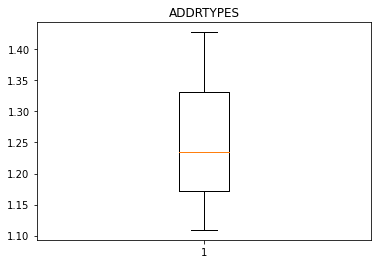

In [41]:
data = df[['ADDRTYPE', 'SEVERITYCODE']].groupby(['ADDRTYPE']).mean()
print(data)

fig1, ax1 = plt.subplots()
ax1.set_title('ADDRTYPES')
ax1.boxplot(data)
plt.show()

In [30]:
#converting objects to Int
df['UNDERINFL'].replace('N', 0, inplace = True)
df['UNDERINFL'].replace('Y', 1, inplace = True)
df['UNDERINFL'].replace('0', 0, inplace = True)
df['UNDERINFL'].replace('1', 1, inplace = True)
print('UNDERINFL:')
print(df['UNDERINFL'].value_counts())

df['HITPARKEDCAR'].replace('N', 0, inplace = True)
df['HITPARKEDCAR'].replace('Y', 1, inplace = True)
print('\nHITPARKEDCAR:')
print(df['HITPARKEDCAR'].value_counts())

df['ADDRTYPE'].replace('Block', 1, inplace = True)
df['ADDRTYPE'].replace('Intersection', 2, inplace = True)
df['ADDRTYPE'].replace('Alley', 3, inplace = True)
print('\nADDRTYPE:')
print(df['ADDRTYPE'].value_counts())

UNDERINFL:
0    185552
1      9121
Name: UNDERINFL, dtype: int64

HITPARKEDCAR:
0    187457
1      7216
Name: HITPARKEDCAR, dtype: int64


In [31]:
#data descriptive analysis
df.describe()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,HITPARKEDCAR
count,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000
mean,1.298901,2.444427,0.037139,0.028391,1.920780,0.046853,0.037067
std,0.457778,1.345929,0.198150,0.167413,0.631047,0.211324,0.188927
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
75%,2.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,2.000000,81.000000,6.000000,2.000000,12.000000,1.000000,1.000000


In [32]:
df.corr()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,HITPARKEDCAR
SEVERITYCODE,1.000000,0.130949,0.246338,0.214218,-0.054686,0.044377,-0.101498
PERSONCOUNT,0.130949,1.000000,-0.023464,-0.038809,0.380523,0.022420,-0.052766
PEDCOUNT,0.246338,-0.023464,1.000000,-0.016920,-0.261285,0.016592,-0.035264
PEDCYLCOUNT,0.214218,-0.038809,-0.016920,1.000000,-0.253773,-0.016401,-0.030187
VEHCOUNT,-0.054686,0.380523,-0.261285,-0.253773,1.000000,0.006609,0.048845
UNDERINFL,0.044377,0.022420,0.016592,-0.016401,0.006609,1.000000,0.010153
HITPARKEDCAR,-0.101498,-0.052766,-0.035264,-0.030187,0.048845,0.010153,1.000000


<h1>2) Methodology</h1>

<h3>3) Results</h3>
<h3>4) Discussion</h3>
<h3>5) Conclusions</h3>